# Analysis of MCM-41 Potential

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from CifFile import ReadCif
import include.colors as colortools
import platform

In [2]:
if 'Darwin' in platform.system():
    %config InlineBackend.figure_format = 'retina'
    %matplotlib inline

In [9]:
plot_colors = colortools.get_linear_colors('viridis',10)
dark_purple = plot_colors[0]
purple = plot_colors[1]
dark_blue = plot_colors[2]
blue = plot_colors[3]
teal = plot_colors[4]
aquamarine = plot_colors[5]
green = plot_colors[6]
light_green = plot_colors[7]
dead_grass = plot_colors[8]
yellow = plot_colors[9]

In [4]:
def read_xyz(filename):
    """Read filename in XYZ format and return lists of atoms and coordinates.

    If number of coordinates do not agree with the statd number in
    the file it will raise a ValueError.
    """

    atoms = []
    coordinates = []

    xyz = open(filename)
    n_atoms = int(xyz.readline())
    title = xyz.readline()
    for line in xyz:
        atom,x,y,z = line.split()
        atoms.append(atom)
        coordinates.append([float(x), float(y), float(z)])
    xyz.close()

    #if n_atoms != len(coordinates):
    #    raise ValueError("File says %d atoms but read %d points." % (n_atoms, len(coordinates))
                         
    return atoms, coordinates

In [5]:
atoms,coordinates = read_xyz('../Data/mcm-41_extended.xyz')

In [35]:
pos = {}
mcm41 = np.array(coordinates)
for atom in ['H','Si','O']:
    pos[atom] = []
    
for i,atom in enumerate(atoms):
    pos[atom].append(coordinates[i])
    
for atom in ['H','Si','O']:
    pos[atom] = np.array(pos[atom])

Text(0, 0.5, 'y (Å)')

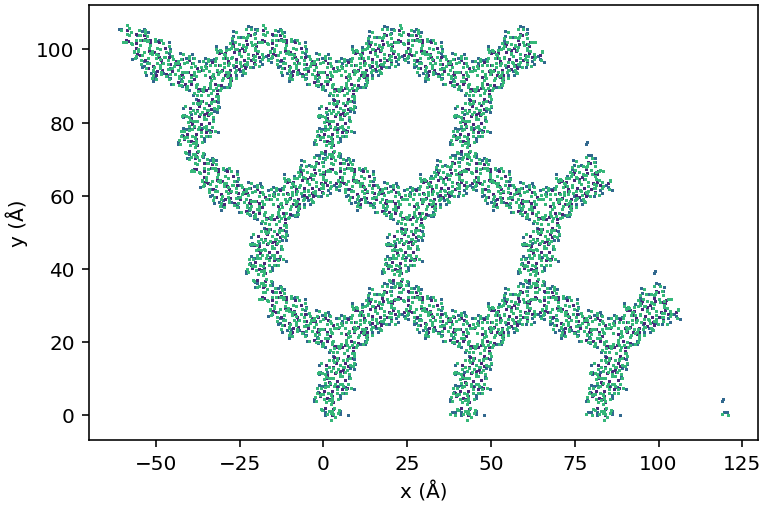

In [18]:
c = [blue,purple,green]
for i,atom in enumerate(['H','Si','O']):
    plt.scatter(pos[atom][:,0],pos[atom][:,1], color=c[i], s=0.1, marker='o')
plt.xlabel('x (Å)');
plt.ylabel('y (Å)')

Text(0, 0.5, 'y (Å)')

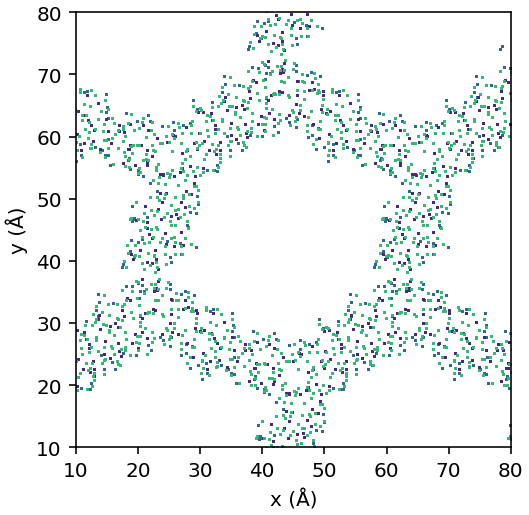

In [34]:
c = [blue,purple,green]
fig,ax = plt.subplots()
for i,atom in enumerate(['H','Si','O']):
    plt.scatter(pos[atom][:,0],pos[atom][:,1], color=c[i], s=0.1, marker='o')
    
ax.set_xlim(10,80)
ax.set_ylim(10,80)
ax.set_aspect('equal')
ax.set_xlabel('x (Å)');
ax.set_ylabel('y (Å)')

## Find the Centroid of the Points in this region

In [57]:
xmin,xmax = 10,80
ymin,ymax = 10,80
idx = np.where((mcm41[:,0] >= xmin) & (mcm41[:,0] <=xmax) & (mcm41[:,1] <=ymax) & (mcm41[:,1] >= ymin) )[0]

center = np.array([np.sum(mcm41[idx,0])/len(idx),np.sum(mcm41[idx,1])/len(idx)])


In [58]:
center

array([44.85098191, 44.18361881])

Text(0, 0.5, 'y (Å)')

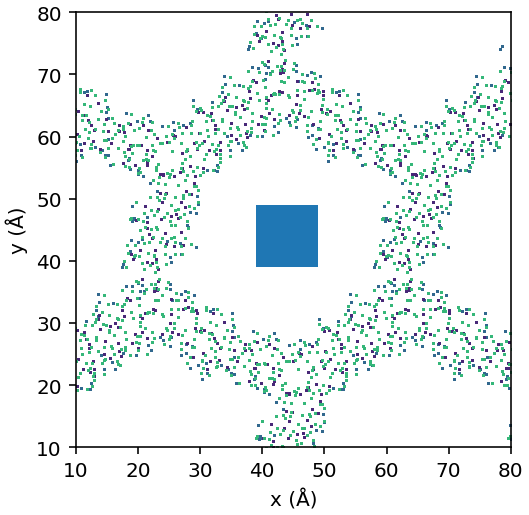

In [76]:
import matplotlib.patches as patches

c = [blue,purple,green]
fig,ax = plt.subplots()
for i,atom in enumerate(['H','Si','O']):
    plt.scatter(pos[atom][:,0],pos[atom][:,1], color=c[i], s=0.1, marker='o')

ax.add_patch(patches.Rectangle((39,39), 10, 10))
#plt.scatter(center[0],center[1], color='k')
    
ax.set_xlim(10,80)
ax.set_ylim(10,80)
ax.set_aspect('equal')
ax.set_xlabel('x (Å)');
ax.set_ylabel('y (Å)')

In [129]:
x_loc = np.linspace(39,49,10)
y_loc = np.linspace(39,49,10)
X_loc,Y_loc = np.meshgrid(x_loc,y_loc)

grid_pos = np.zeros([len(x_loc)*len(y_loc),3])
i = 0
for x in x_loc:
    for y in y_loc:
        grid_pos[i,0] = x   
        grid_pos[i,1] = y
        i += 1

In [132]:
i = 0
for ix,x in enumerate(x_loc):
    for iy,y in enumerate(y_loc):
        for cr in mcm41[idx]:
            r = euclidean(grid_pos[i],cr)
            test_V[ix,iy] -= 1.0/r**3  
        i += 1

In [136]:
test_V

array([[-593.48069941, -593.47343476, -593.46878961, ..., -593.14631301,
        -593.14631301, -593.14631301],
       [-593.47473382, -593.46752726, -593.46277244, ..., -593.14631301,
        -593.14631301, -593.14631301],
       [-593.47106399, -593.46379288, -593.458881  , ..., -593.14631301,
        -593.14631301, -593.14631301],
       ...,
       [-593.14631301, -593.14631301, -593.14631301, ..., -593.14631301,
        -593.14631301, -593.14631301],
       [-593.14631301, -593.14631301, -593.14631301, ..., -593.14631301,
        -593.14631301, -593.14631301],
       [-593.14631301, -593.14631301, -593.14631301, ..., -593.14631301,
        -593.14631301, -593.14631301]])

In [127]:
cdist(grid_pos[0,:],mcm41[idx])

ValueError: XA must be a 2-dimensional array.

In [128]:
grid_pos[0]

array([39., 39.,  0.])

In [93]:
r = cdist(grid_pos,mcm41[idx])

In [123]:
np.sum(1.0/r[0,:])

592.0695897082866

In [124]:
np.sum(1.0/r[1,:])

592.0778591653672

In [130]:
from scipy.spatial.distance import cdist,euclidean

In [112]:
for ix,x in enumerate(x_loc):
    for iy,y in enumerate(y_loc):
        test_V[ix,iy] = np.sum(-1.0/r[i])   

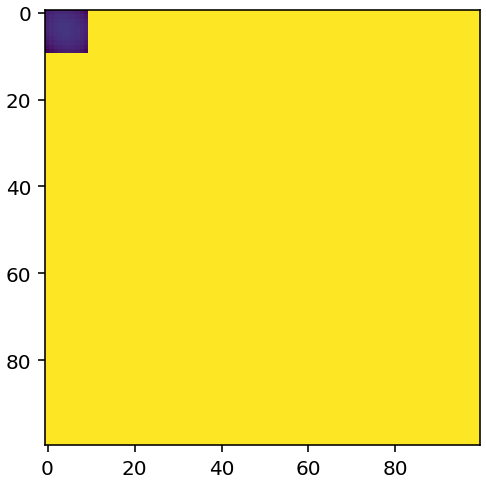

In [133]:
plt.imshow(test_V)

In [135]:
np.min(test_V)

-593.5084427456726